# 線性回歸（Linear Regression）實作流程

### 1. 匯入必要套件, 並讀取資料集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### 2. 清理欄位 (第一欄 Unnamed)

In [2]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 3. 定義特徵與目標變數

In [3]:
X = df.drop(columns=["sales"]) # 特徵是除了sales之外其他的欄位
y = df["sales"]         # 目標變數

### 4. 分割資料集為訓練與測試集

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

### 5. 建立與訓練模型

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)

### 6. 訓練模型會學習到以下參數

$\hat y=\theta_0+\theta_1\;x_1+\theta_2\;x_2+...$

`lr.coef_`=[$\theta_1, \theta_2, \theta_3...$]

`lr.intercept_` = $\theta_0$

In [ ]:
print(lr.coef_)
print(lr.intercept_)

### 7. 模型預測（Prediction）

In [ ]:
y_pred_test = lr.predict(X_test)
y_pred_test

In [ ]:
## 線性回歸的評估指標
### 1. 平均絕對誤差（Mean Absolute Error, MAE）
### 2. 均方誤差（Mean Squared Error, MSE）
### 3. 均方根誤差（Root Mean Squared Error, RMSE）
### 4. 決定係數（R² Score）


In [ ]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
# rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmse = np.sqrt(mse) # 舊版scikit-learn 舊版不支援 squared 參數時使用
r2 = r2_score(y_test, y_pred_test)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Regularizsation
## Lasso Regression（L1 正則化）
- Lasso 在此基礎上增加 **L1 正則化項**：
$$min_{\beta}(\sum_{i=1}^n(y_i-({\beta}_0+\sum_{j=1}^p \beta_j\;x_{ij}))^2+\lambda\sum_{j=1}^p|\beta_j|)$$

其中：
- λ≥0 ：正則化強度
- L1 範數會強迫部分係數縮為 0 → 達到 **特徵選擇** 效果

## Ridge Regression（L2 正則化）

L1 的範數變平方
$$\lambda\sum_{j=1}^p \beta_j^2$$

## Elastic Net, L1 及 L2 的比例相加
$$\lambda(\;\alpha \sum_{j=1}^p|\beta_j| + (1-\alpha)\sum_{j=1}^p\beta_j^2)$$

### 特性

1. **結合 L1 與 L2 優點**
    - L1：能讓部分係數變 0 → 特徵選擇
    - L2：能處理高度共線性，避免單一特徵被隨機選中
2. **解決 Lasso 的缺點**
    - Lasso 在 p>n 或特徵高度相關時，可能只選一個特徵，其餘丟棄。
    - Elastic Net 會傾向把相關特徵「一起選進來」。
3. **比單獨的 Lasso 或 Ridge 更穩健**
    適合高維度資料或特徵數量遠大於樣本數時。

In [11]:
# Lasso Regularization

from sklearn.linear_model import Lasso, Ridge, ElasticNet
model=Lasso(alpha=10.0)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
# rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmse = np.sqrt(mse) # 舊版scikit-learn 舊版不支援 squared 參數時使用
r2 = r2_score(y_test, y_pred_test)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1.21
MSE: 2.22
RMSE: 1.49
R² Score: 0.91


In [12]:
# Ridge Regularization

model=Ridge(alpha=10.0)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
# rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmse = np.sqrt(mse) # 舊版scikit-learn 舊版不支援 squared 參數時使用
r2 = r2_score(y_test, y_pred_test)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.21
MSE: 2.22
RMSE: 1.49
R² Score: 0.91


In [13]:
# ElasticNet Regularization

model=ElasticNet(alpha=10.0, l1_ratio=0.5)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
# rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rmse = np.sqrt(mse) # 舊版scikit-learn 舊版不支援 squared 參數時使用
r2 = r2_score(y_test, y_pred_test)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.29
MSE: 2.61
RMSE: 1.61
R² Score: 0.90


# 線性回歸的基本假設（Assumptions of Linear Regression）

## 1. 線性關係（Linearity）

- 假設輸入特徵與目標之間存在線性關係。
- 可透過 **散佈圖（scatter plot）/ pairplot** 或 **皮爾森相關係數（Pearson correlation）** 驗證。

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


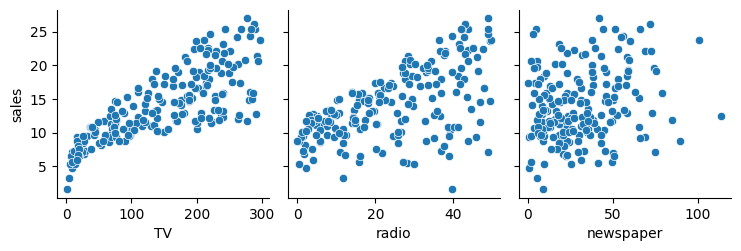

In [14]:
import seaborn as sns
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", kind="scatter")

df.corr()  # 查看數值相關係數

- 解讀相關係數：
    - TV 與 sales：0.78（強線性）
    - Radio 與 sales：0.57（中度線性）
    - Newspaper 與 sales：0.22（弱線性）

### 2. 殘差平均值為 0（Mean of Residuals = 0）
- 殘差 = y_true - y_pred
- 若殘差平均值接近 0，代表模型未系統性偏離預測

In [16]:
residuals = y_test - y_pred_test
residuals.mean()

np.float64(-0.014024231849451615)

## 3. 誤差項呈常態分布（Normally Distributed Errors）
- 可使用 **distplot** 繪圖觀察殘差分布

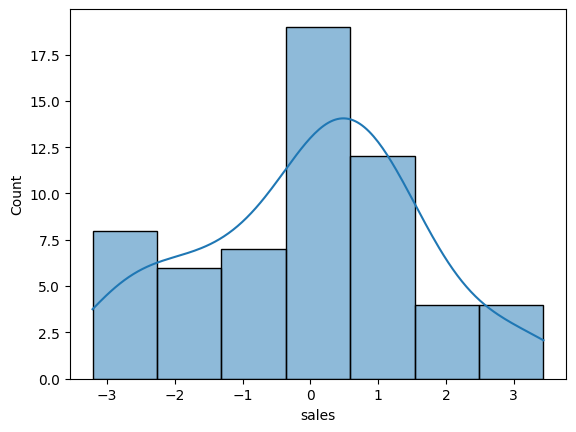

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.show()

## 4. 無多重共線性（No Multicollinearity）

- 假設特徵之間彼此不強相關
- 否則模型難以辨別各特徵貢獻度 → 影響解釋性與預測準確性

### 檢查方式：VIF（Variance Inflation Factor）

- 使用 `statsmodels` 套件計算 VIF

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_score(X):
    X_array = X.values
    vif = [variance_inflation_factor(X_array, i) for i in range(X.shape[1])]
    return pd.DataFrame({'Feature': X.columns, 'VIF': vif})

vif_score(X_train)

,Feature,VIF
0,TV,2.583582
1,radio,3.192295
2,newspaper,3.194723


- **解讀指標**：
    - VIF > 4：有中度共線性
    - VIF > 10：高共線性（需處理）
    - 解法：刪除共線性高的特徵後重訓模型